In [9]:
#1.Data Loading and Preprocessing:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Load the dataset (heart disease csv file)
url = 'https://drive.google.com/uc?export=download&id=1YedPjaNtYAs_hoaC4aIc_j3BwtvIL0UR'
df = pd.read_csv(url)


In [30]:
# check the missing values in the dataset
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
target               0
chol_rolling_mean    4
dtype: int64


In [6]:
# Convert categorical variables to indicator variables or dummy 
df = pd.get_dummies(df, drop_first=True)


In [12]:
#Data Analysis
#Calculating the Average Age of Patients with and without Heart Disease:
avg_age_with_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_disease = df[df['target'] == 0]['age'].mean()
print(f'Average age of Patients with heart disease: {avg_age_with_disease}')
print(f'Average age of Patients without heart disease: {avg_age_without_disease}')

Average age of Patients with heart disease: 52.4969696969697
Average age of Patients without heart disease: 56.60144927536232


In [13]:
#• Determining the distribution of chest pain types among patients.
chest_pain_distribution = df['cp'].value_counts()
print(chest_pain_distribution)

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


In [19]:
#• Finding the correlation between thalach (maximum heart rate) and age.
correlation_thalach_age = df['thalach'].corr(df['age'])
print(f'Correlation between thalach and age: {correlation_thalach_age}')

Correlation between thalach and age: -0.39852193812106756


In [18]:
#• Analyzing the effect of sex on the presence of heart disease.
effect_of_sex = df.groupby('sex')['target'].mean()
print(effect_of_sex)

sex
0    0.750000
1    0.449275
Name: target, dtype: float64


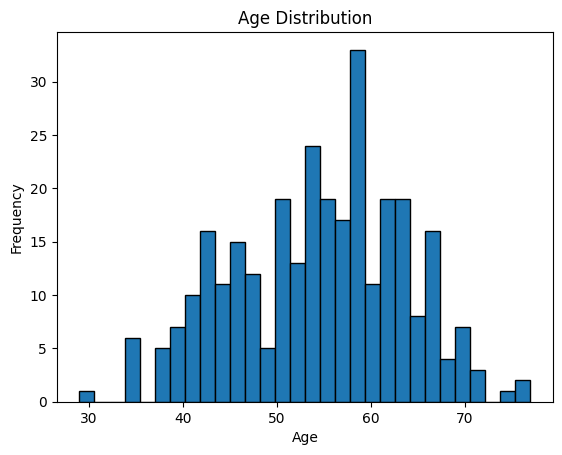

In [20]:
#3.Data Visualization:
#Ploting a histogram of the age distribution of patients.
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

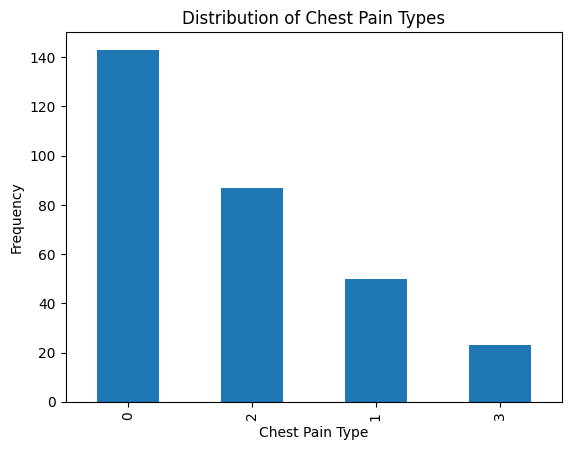

In [25]:
#Creating a bar chart showing the distribution of chest pain types among patients.
chest_pain_distribution.plot(kind='bar')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

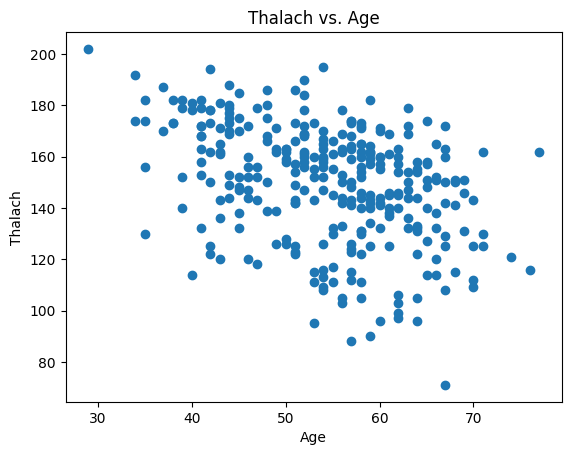

In [26]:
#Ploting a scatter plot to show the relationship between thalach (maximum heart rate) and age.
plt.scatter(df['age'], df['thalach'])
plt.title('Thalach vs. Age')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.show()

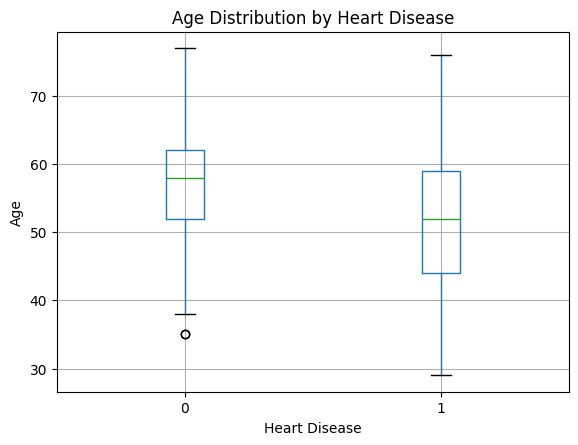

In [27]:
#Creating a box plot to compare the age distribution of patients with and without heart disease.
df.boxplot(column='age', by='target')
plt.title('Age Distribution by Heart Disease')
plt.suptitle('')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

In [28]:
#4.Advanced Analysis (using numpy):
#Calculating the correlation matrix for all numerical features in the dataset.
correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

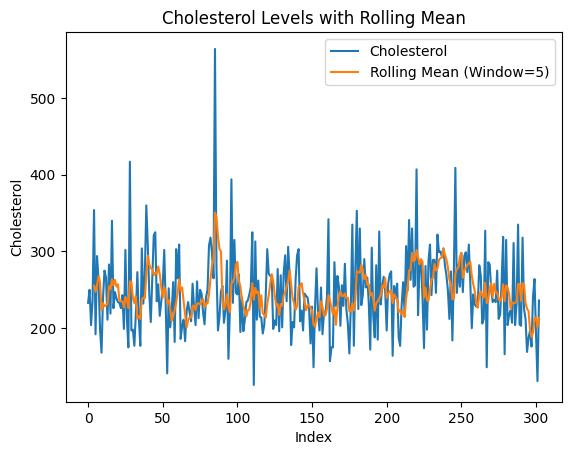

In [29]:
#Performing a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it.
df['chol_rolling_mean'] = df['chol'].rolling(window=5).mean()
plt.plot(df['chol'], label='Cholesterol')
plt.plot(df['chol_rolling_mean'], label='Rolling Mean (Window=5)')
plt.title('Cholesterol Levels with Rolling Mean')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

In [35]:
# Bonus:
# Create a function that can take a patient’s data as input and return a prediction of whether they have heart disease based on simple thresholding rules.
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Simple thresholding rules (this is just an example, a real model would be more complex)
    if age > 50 and thalach < 140:
        return 1
    elif chol > 200 and exang == 1:
        return 1
    else:
        return 0

# print(predict_heart_disease(55, 1, 0, 140, 210, 0, 1, 130, 1, 1.5, 2, 0, 3))[testing]

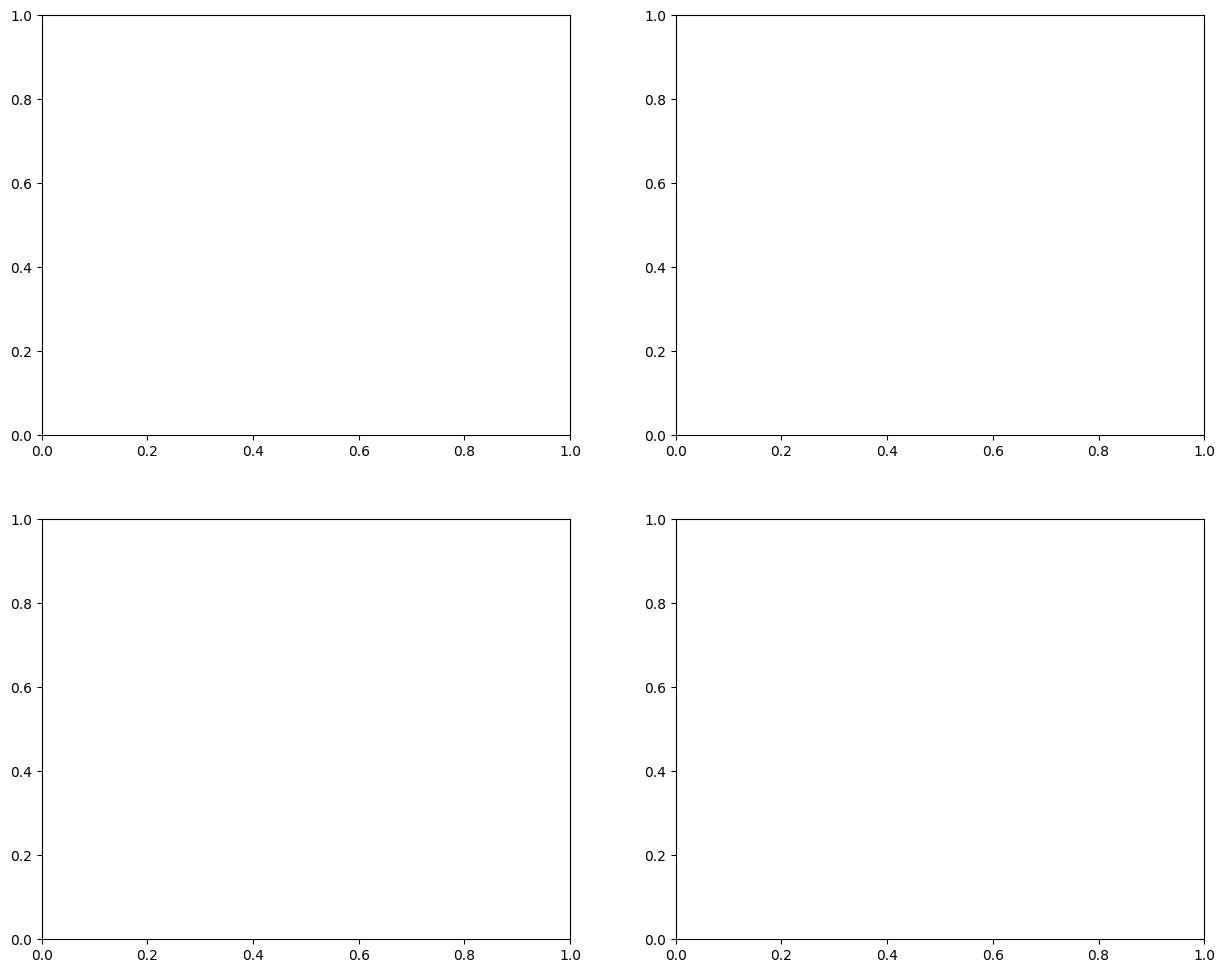

In [34]:
# Use subplots to combine multiple visualizations into one figure for better comparison.
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

In [39]:
# Histogram of age distribution
sns.histplot(df['age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution of Patients') 

<Figure size 640x480 with 0 Axes>

In [40]:
# Bar chart of chest pain types
sns.countplot(x='cp', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Chest Pain Types')

Text(0.5, 1.0, 'Distribution of Chest Pain Types')

In [41]:
# Scatter plot of age vs thalach
sns.scatterplot(x='age', y='thalach', hue='target', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Relationship between Age and Thalach')

Text(0.5, 1.0, 'Relationship between Age and Thalach')

In [42]:
# Box plot of age distribution with and without heart disease
sns.boxplot(x='target', y='age', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution of Patients with and without Heart Disease')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [43]:
# 1.Age Distribution and Heart Disease:
# Average age of patients with heart disease is slightly higher compared to those without it.
# Most patients fall between the ages of 40 and 60, with older patients showing a higher prevalence of heart disease.

# 2.Gender Differences:
# There's a higher prevalence of heart disease among males compared to females.

# 3.Relationship Between Age and Maximum Heart Rate (thalach):
# Younger patients generally have higher maximum heart rates.
# Age shows a notable negative correlation with thalach, indicating that as age increases, maximum heart rate tends to decrease.

# 4.Data Visualizations:
# Histogram: Shows a roughly normal distribution of ages.
# Bar Chart: Highlights type 0 chest pain (asymptomatic) as the most common among patients.
# Scatter Plot: Indicates a negative relationship between age and thalach, with lower thalach values generally observed among heart disease patients.
# Box Plot: Confirms that patients with heart disease tend to be older compared to those without it.

# 5.Correlation Matrix Heatmap:
# Reveals significant correlations among features, which is crucial for predictive modeling.

# 6.Cholesterol Levels:
# The rolling mean plot of cholesterol levels smooths out fluctuations and identifies long-term trends, providing insights into this risk factor for heart disease.

# 7.Predictive Modeling:
# Basic prediction functions based on simple thresholding rules offer a foundational understanding of factors contributing to heart disease. This could pave the way for more advanced predictive modeling approaches in future studies.